# Classification
This notebook demonstrates some of the algorithms for the binary classification.

### Getting Started

Let's start by importing the necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=15)
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)


dataset = pd.read_csv('C:/Users/jassw/Desktop/dataset/diabetes.csv',header=0)

### Exploring the dataset

Now, we have imported our dataset.Let's explore the dataset to get more insight about the type of data and the size of the dataset.



In [4]:
print("The shape of the dataset:" + str(dataset.shape))
print(dataset.info())

The shape of the dataset:(15000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
PatientID                 15000 non-null int64
Pregnancies               15000 non-null int64
PlasmaGlucose             15000 non-null int64
DiastolicBloodPressure    15000 non-null int64
TricepsThickness          15000 non-null int64
SerumInsulin              15000 non-null int64
BMI                       15000 non-null float64
DiabetesPedigree          15000 non-null float64
Age                       15000 non-null int64
Diabetic                  15000 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
None


In [5]:
# Checking if any Null values
dataset.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [6]:
# Fetching the column headers
print(list(dataset.columns))

['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age', 'Diabetic']


In [7]:
# Getting the first 10 records of the datatset
dataset.head(n=10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


Now, we have better sense of the datset and it can be concluded that this dataset is of the diabetes patients.It records the various features ie. PatientID, Blood Pressure, BMI, Age etc for the Patients.Also all the features are numerical except the Diabetic target dependent variable which is a categorical variable i.e Diabetic(0)/ Non-diabetic(1).


In [8]:
# Dropped the PatientID Column as it's just an ID
dataset = dataset.drop(['PatientID'],axis=1)

In [9]:
dataset.groupby('Diabetic').mean()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
Diabetic,,,,,,,,
0,2.2479,104.9622,70.1387,27.2444,114.5765,30.057052,0.353457,27.2090
1,5.1778,113.6462,73.3846,31.9532,184.4034,34.414834,0.489990,35.9952


As we can see that average scenarios for the Diabetic Patients is significantly higher than the Non-diabetic Patients.For example the average Age of the Diabetic Patients is higher than the average age of Non-diabetic Patients.

So Can we conlcude that the Higher the Age,The more chances of getting diabetic? Let's find the co-relation between the two.

In [10]:
dataset['Age'].corr(dataset['Diabetic'])

0.34260499494073321

So, There is a positive correlation but less than 0.5.Also, remember that correlation is not causation. 


In [11]:
# Let's get some more sense of the data
dataset.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [12]:
# Median
dataset.median()

Pregnancies                 2.000000
PlasmaGlucose             104.000000
DiastolicBloodPressure     72.000000
TricepsThickness           31.000000
SerumInsulin               83.000000
BMI                        31.767940
DiabetesPedigree            0.200297
Age                        24.000000
Diabetic                    0.000000
dtype: float64

### Visualisation
Let's plot some graphs to get more sense of the data

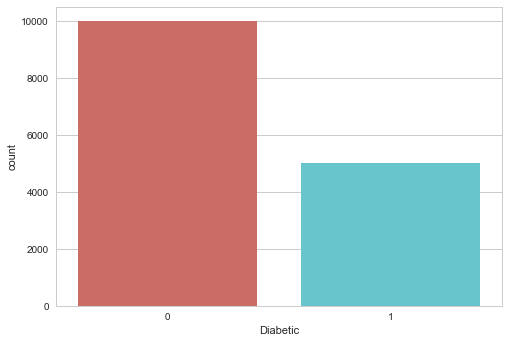

0    10000
1     5000
Name: Diabetic, dtype: int64

In [13]:
# Plot for Diabetic(Yes(1),No(0))
sns.countplot(x='Diabetic',data = dataset, palette = 'hls')
sns.set(style="white")
plt.show()

# Counting Yes/No Values 
dataset['Diabetic'].value_counts()

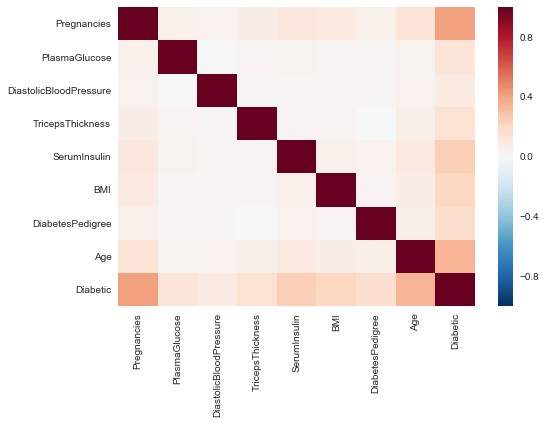

In [14]:
# Heatmap
sns.heatmap(dataset.corr())
plt.show()

Heatmap depicts the relationship between the datapoints.Here the color intensity gives the strength of the relationship. 

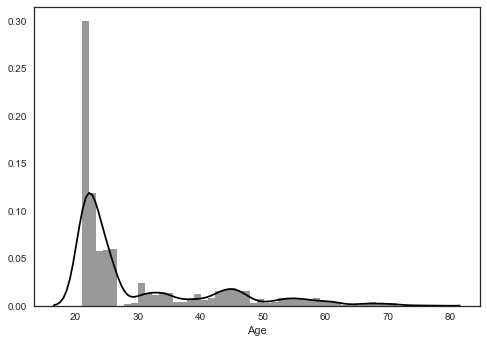

In [15]:
# Histogram
x = dataset['Age']
sns.distplot(x,color = 'black')

As we can see that the distribution is Right-skewed, So we can consider taking the log of the variable  to reduce skewness to some level.

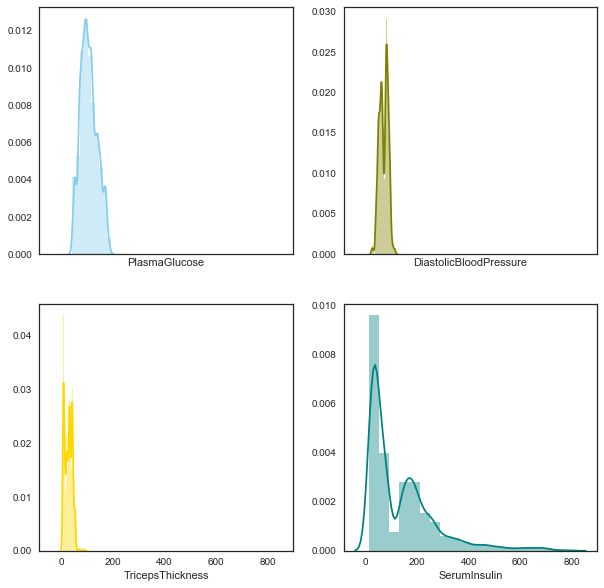

In [16]:
# Histograms with seaborn
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot( dataset['PlasmaGlucose'] , color="skyblue",bins=10,  ax=axes[0, 0])
sns.distplot( dataset["DiastolicBloodPressure"],color="olive",bins=20,ax=axes[0, 1])
sns.distplot( dataset["TricepsThickness"] ,color="gold",bins=20,ax=axes[1, 0])
sns.distplot( dataset["SerumInsulin"] ,color="teal",bins=20,ax=axes[1, 1])


These distributions looks normal. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F89C28400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027F8B3237F0>]], dtype=object)

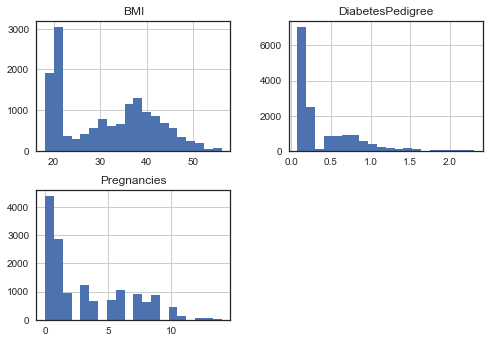

In [17]:
# Histograms with pandas
df = dataset[['BMI','DiabetesPedigree','Pregnancies']]
df.hist(bins=20)

DiabetesPedigree and Pregnancies looks right skewed.

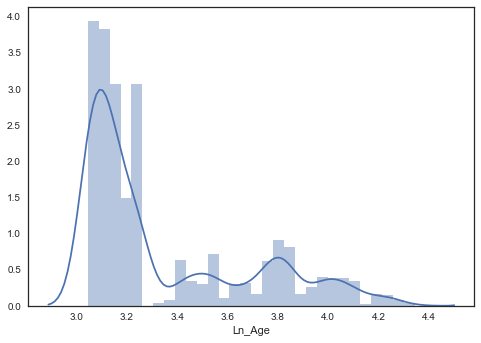

In [18]:
# Taking ln of Age column to create new column Ln_Age
dataset['Ln_Age'] = np.log(dataset.Age)
sns.distplot(dataset['Ln_Age'],bins=30)


Looks better now.
### Feature Scaling


In [19]:
# Standardization (or Z-Score Normalization)
from sklearn.preprocessing import StandardScaler
dataset_copy = dataset.copy()
Zscale_cols = ['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']
Zscale_features = dataset_copy[Zscale_cols]
zscale_scaled = StandardScaler().fit_transform(Zscale_features.values)
dataset_copy[Zscale_cols] = zscale_scaled
print(dataset_copy)

       Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0                0       1.974401                0.523884          0.356298   
1                8      -0.495823                1.299626          1.249448   
2                7       0.223356               -1.445306          1.592967   
3                9      -0.151868                0.404539         -0.262036   
4                1      -0.714703               -0.729237         -0.124629   
5                0      -0.808509                1.239953         -1.361298   
6                0       0.786192               -1.445306         -0.674259   
7                0      -1.277539                0.941591          0.974632   
8                8      -0.871047                1.418971          0.287594   
9                1      -1.121196               -2.400065          0.768521   
10               1      -0.620898                0.881919         -1.223890   
11               3      -0.433286                1.4

In [20]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
MinMax_cols = ['Pregnancies','DiabetesPedigree','Age','Ln_Age']
MinMax_features = dataset_copy[MinMax_cols]
MinMax_scaled = MinMaxScaler().fit_transform(MinMax_features.values)
dataset_copy[MinMax_cols] = MinMax_scaled
dataset_final = dataset_copy
print(dataset_final)

       Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0         0.000000       1.974401                0.523884          0.356298   
1         0.571429      -0.495823                1.299626          1.249448   
2         0.500000       0.223356               -1.445306          1.592967   
3         0.642857      -0.151868                0.404539         -0.262036   
4         0.071429      -0.714703               -0.729237         -0.124629   
5         0.000000      -0.808509                1.239953         -1.361298   
6         0.000000       0.786192               -1.445306         -0.674259   
7         0.000000      -1.277539                0.941591          0.974632   
8         0.571429      -0.871047                1.418971          0.287594   
9         0.071429      -1.121196               -2.400065          0.768521   
10        0.071429      -0.620898                0.881919         -1.223890   
11        0.214286      -0.433286                1.4

### Splitting the data into Train/Test

In [21]:
# Splitting the data into predictors and the target variable 

X = dataset_final[['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','Pregnancies','DiabetesPedigree','Ln_Age']]
Y = dataset_final[['Diabetic']]

# Splitting the data into test and training set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.30, stratify = Y, random_state = 123 )

Importing all the classifiers to be trained

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
def classifiers(X_train,Y_train,X_test,Y_test):
    
    classifier = { }
    Y_train , Y_test = Y_train.values.ravel(), Y_test.values.ravel()
    # Defining the classifiers
    clf_logit = LogisticRegression(random_state=0, C = 5.0)
    clf_svc_linear = svm.SVC(kernel='linear',C = 5.0, probability = True)
    clf_svc_rbf = svm.SVC(kernel = 'rbf', C = 5.0, probability = True)
    clf_knn = KNeighborsClassifier(n_neighbors=3)
    clf_nbc = GaussianNB()
    clf_dtree = DecisionTreeClassifier(
                                        criterion = 'gini', random_state = 100,
                                        max_depth=3, min_samples_leaf=5
                                      )
    clf_rforest = RandomForestClassifier(
                                        n_estimators=200, criterion='gini', 
                                        min_samples_split=2,random_state=1,
                                       )
    
    clf_gboost  = GradientBoostingClassifier(
                                        loss='deviance', learning_rate=0.3, n_estimators=100, subsample=1.0, 
                                        criterion='friedman_mse', min_samples_split=2, min_samples_leaf=10,
                                        max_depth=3,max_leaf_nodes=5, warm_start=False, presort='auto')
   
    #Fitting the classifiers
    classifier['logit'] = clf_logit.fit(X_train,Y_train)
    classifier['svc_linear'] = clf_svc_linear.fit(X_train,Y_train)
    classifier['svc_rbf'] = clf_svc_rbf.fit(X_train,Y_train)
    classifier['knn'] = clf_knn.fit(X_train,Y_train)
    classifier['nbc'] = clf_nbc.fit(X_train,Y_train)
    classifier['dtree'] = clf_dtree.fit(X_train,Y_train)
    classifier['rforest'] = clf_rforest.fit(X_train,Y_train)
    classifier['gboost'] = clf_gboost.fit(X_train,Y_train)

    return classifier
    

In [24]:
clf = classifiers(X_train,Y_train,X_test,Y_test)
for c in clf:
    print("The Accuracy of " +''+ c +' is'+' '+ str(round(clf[c].score(X_test,Y_test)*100,2)))

    
    
    
    

The Accuracy of logit is 78.56
The Accuracy of svc_linear is 78.87
The Accuracy of svc_rbf is 86.67
The Accuracy of knn is 85.6
The Accuracy of nbc is 79.24
The Accuracy of dtree is 86.62
The Accuracy of rforest is 93.8
The Accuracy of gboost is 95.36


As we can see that we are getting highest accuracy of 95.36 %.Not Bad.
Let's explore some of the metrics with Gradient Boosting

In [25]:
# Computing Precision/Recall

Y_pred = clf['gboost'].predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,Y_pred)
print(matrix)
    

             precision    recall  f1-score   support

          0       0.96      0.97      0.97      3000
          1       0.94      0.92      0.93      1500

avg / total       0.95      0.95      0.95      4500

[[2914   86]
 [ 123 1377]]


In [26]:
# Cross validation

from sklearn import model_selection 
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10,random_state=12)
modelCV = clf['gboost']
result = model_selection.cross_val_score(modelCV,X_train,Y_train.values.ravel(), cv=kfold, scoring='accuracy')
print("10- fold Cross Validation Average Accuracy: %.2f " %(result.mean()*100))

10- fold Cross Validation Average Accuracy: 95.75 


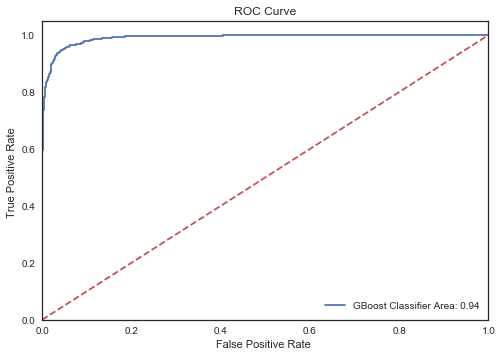

In [27]:
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gboost_roc_auc_score = roc_auc_score(Y_test,Y_pred)
fp_rate, tp_rate, threshold = roc_curve(Y_test,clf['gboost'].predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fp_rate,tp_rate, label = 'GBoost Classifier Area: %0.2f' % gboost_roc_auc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate ")
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()